In [139]:
import pandas as pd
import numpy as np
from os import ST_NOSUID
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_regression


In [140]:
dt1 = pd.read_csv('salary_prediction_data_1.csv')

In [141]:
dt1.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [142]:
dt1.shape

(1000, 7)

In [143]:
dt1.isnull().values.any()

np.False_

In [144]:
print("There is {} missing values in data frame".format(dt1.isnull().sum().sum()))

There is 0 missing values in data frame


In [145]:
print("There is {} duplicated values in data frame".format(dt1.duplicated().sum()))

There is 0 duplicated values in data frame


In [146]:
len(dt1.columns)

7

In [147]:
dt1.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [148]:
numerical_columns = ['Experience', 'Age', 'Salary']

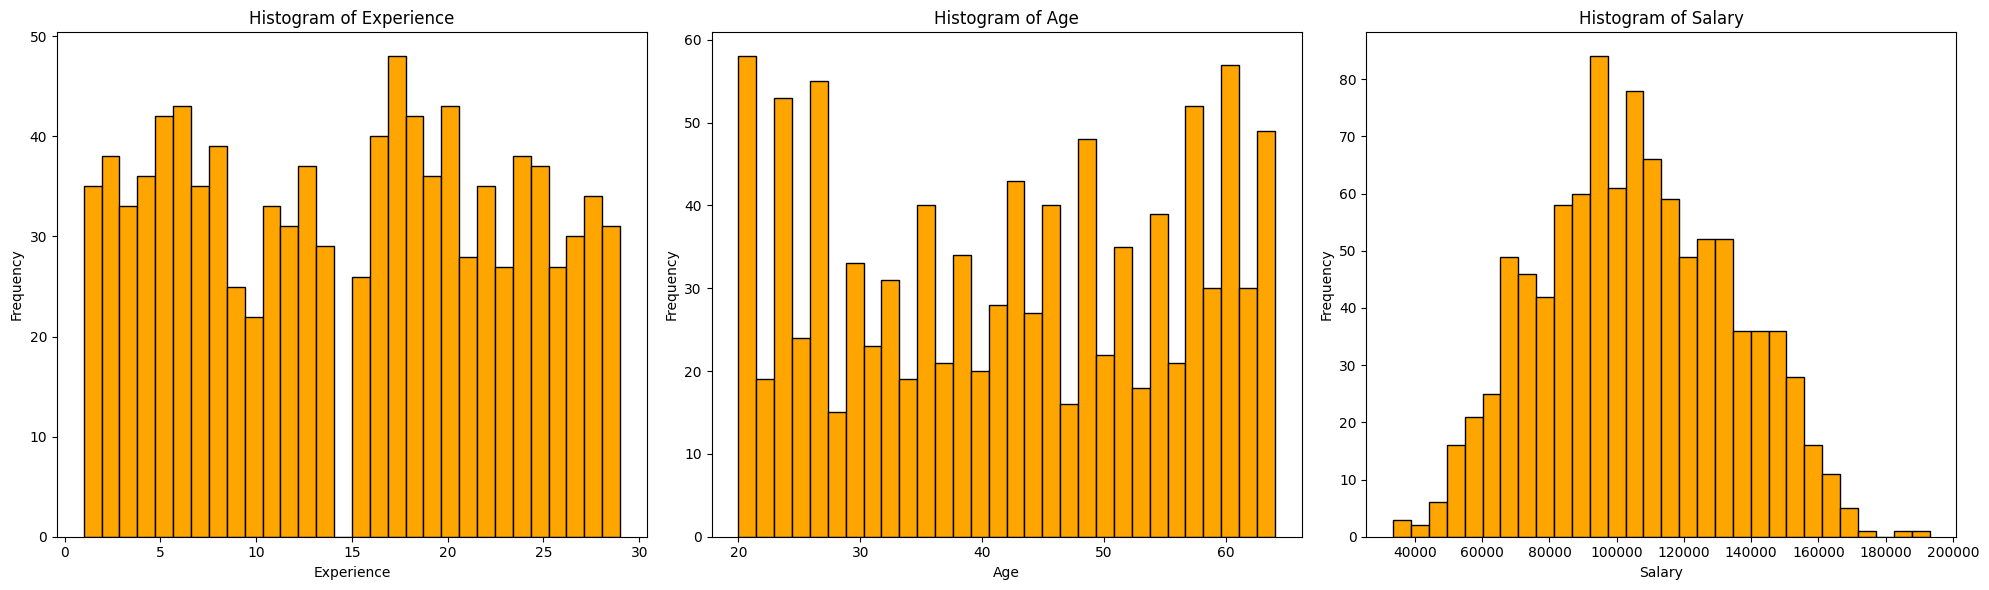

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
        axes[i].hist(dt1[column], bins=30, color='orange', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

/tmp/ipython-input-2844190222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Education', palette='Set2')


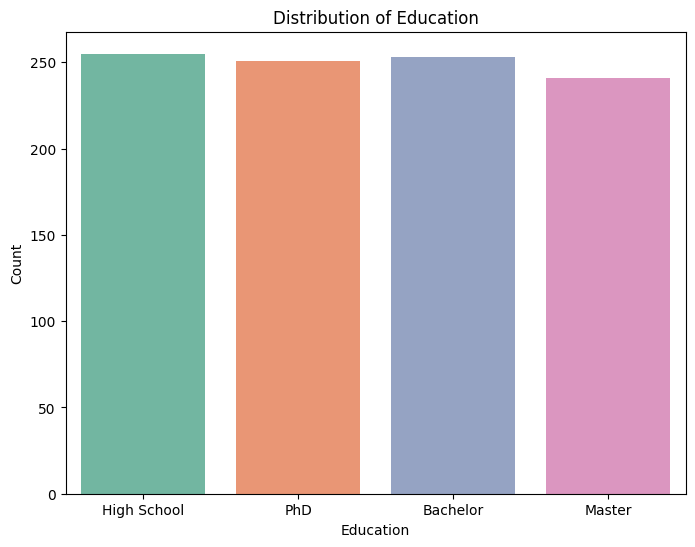

In [150]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dt1, x='Education', palette='Set2')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2588299477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Job_Title', palette='Set2')


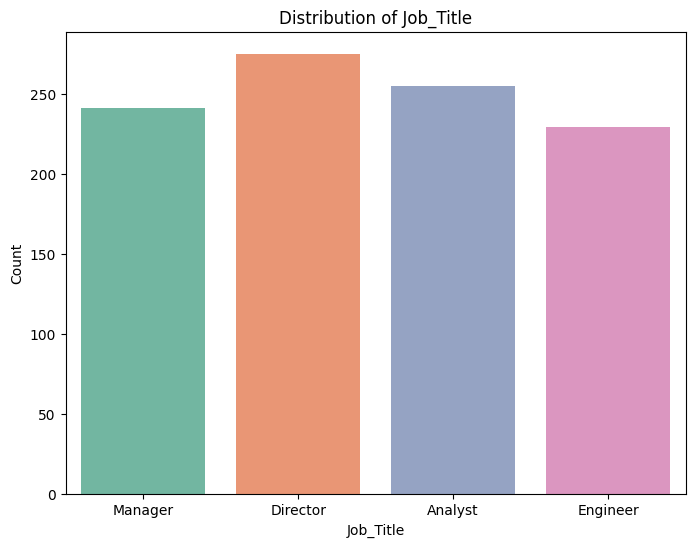

In [151]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dt1, x='Job_Title', palette='Set2')
plt.title('Distribution of Job_Title')
plt.xlabel('Job_Title')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3313620211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Location', palette='Set2')


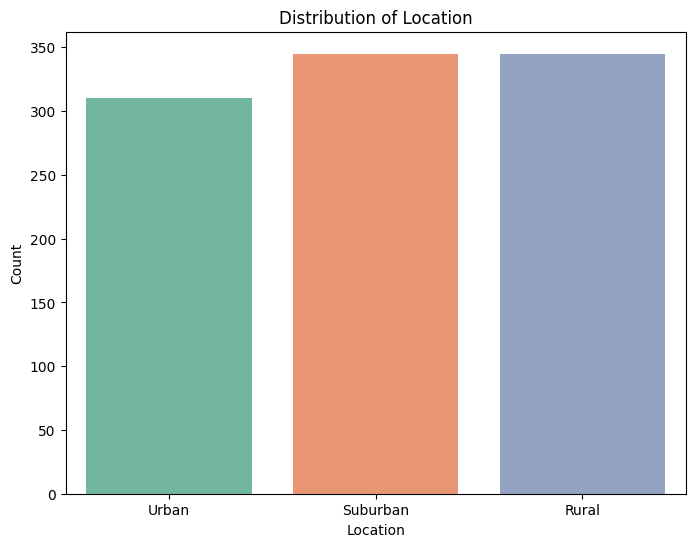

In [152]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dt1, x='Location', palette='Set2')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1147098668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt1, x='Gender', palette='Set2')


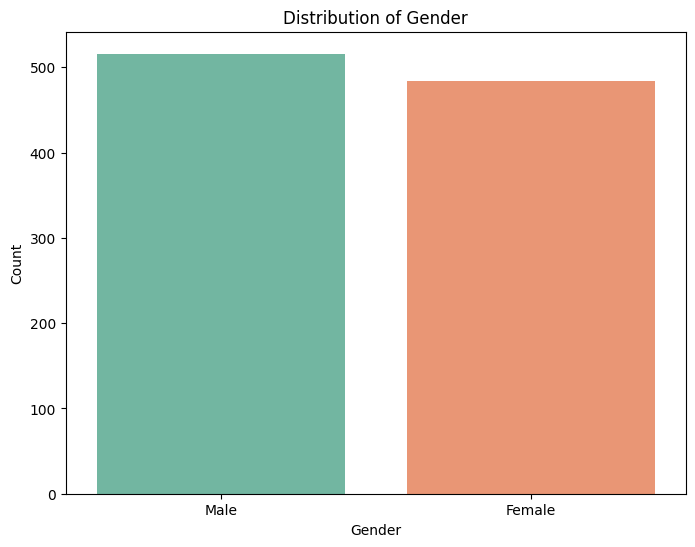

In [153]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dt1, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

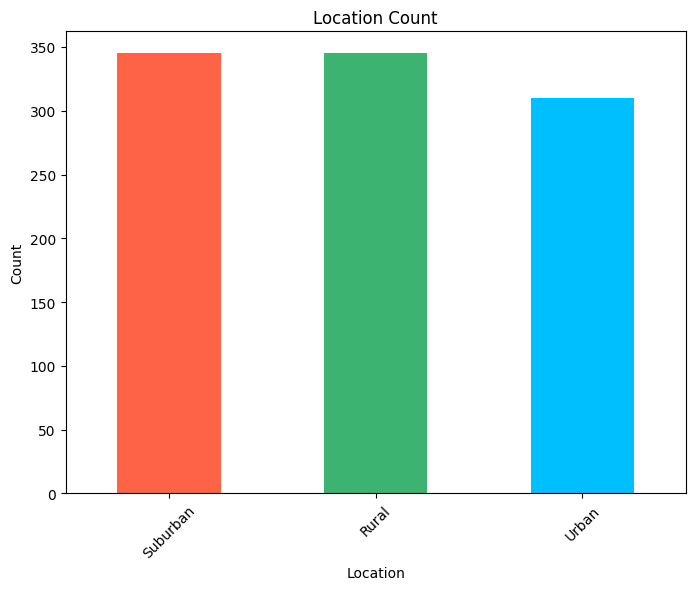

In [154]:
plt.figure(figsize=(8, 6))
Location_counts = dt1['Location'].value_counts()
Location_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Location Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

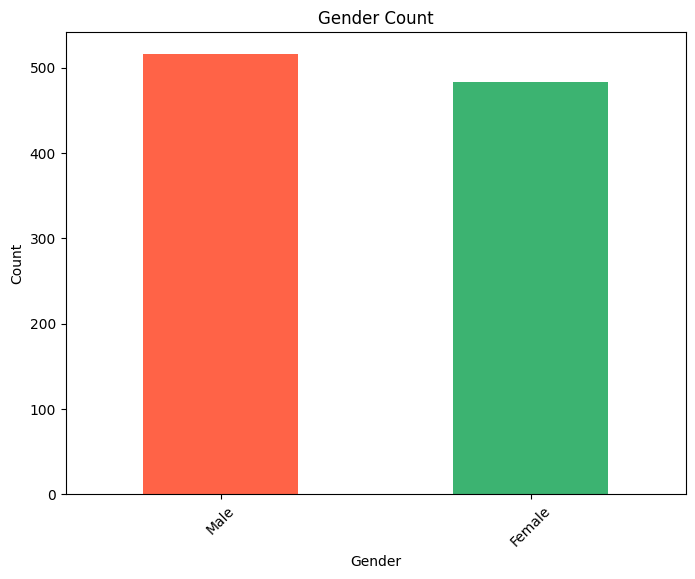

In [155]:
plt.figure(figsize=(8, 6))
Gender_counts = dt1['Gender'].value_counts()
Gender_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

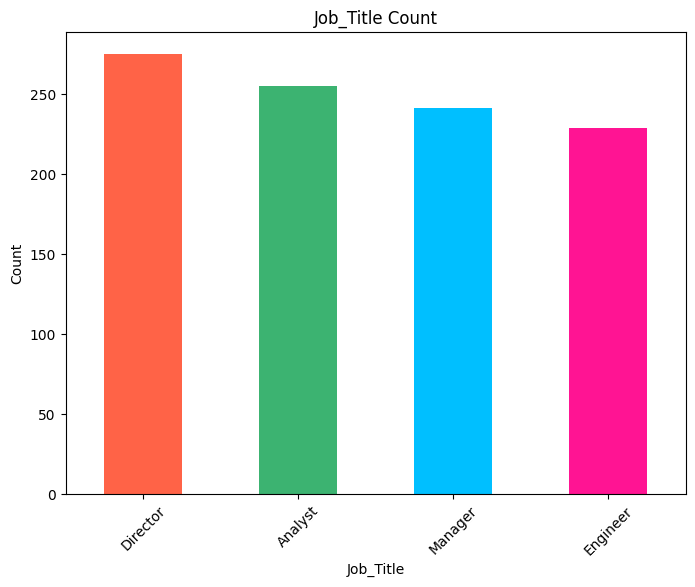

In [156]:
plt.figure(figsize=(8, 6))
Job_Title_counts = dt1['Job_Title'].value_counts()
Job_Title_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Job_Title Count')
plt.xlabel('Job_Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

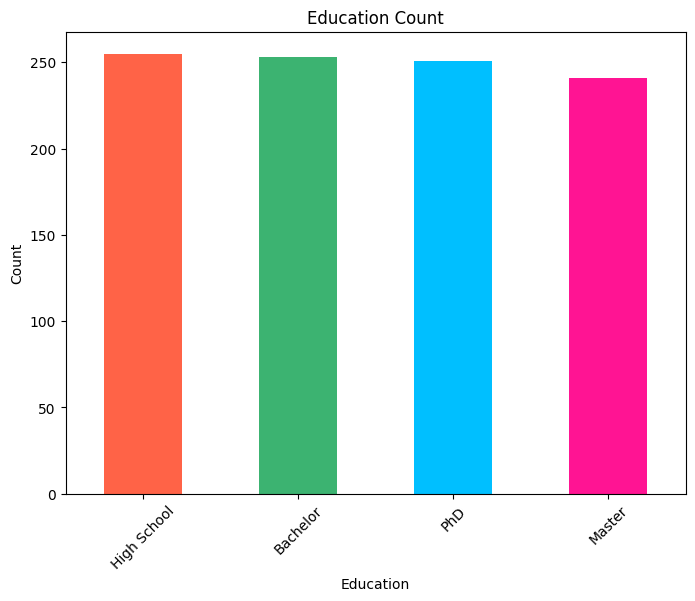

In [157]:
plt.figure(figsize=(8, 6))
Education_counts = dt1['Education'].value_counts()
Education_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Education Count')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

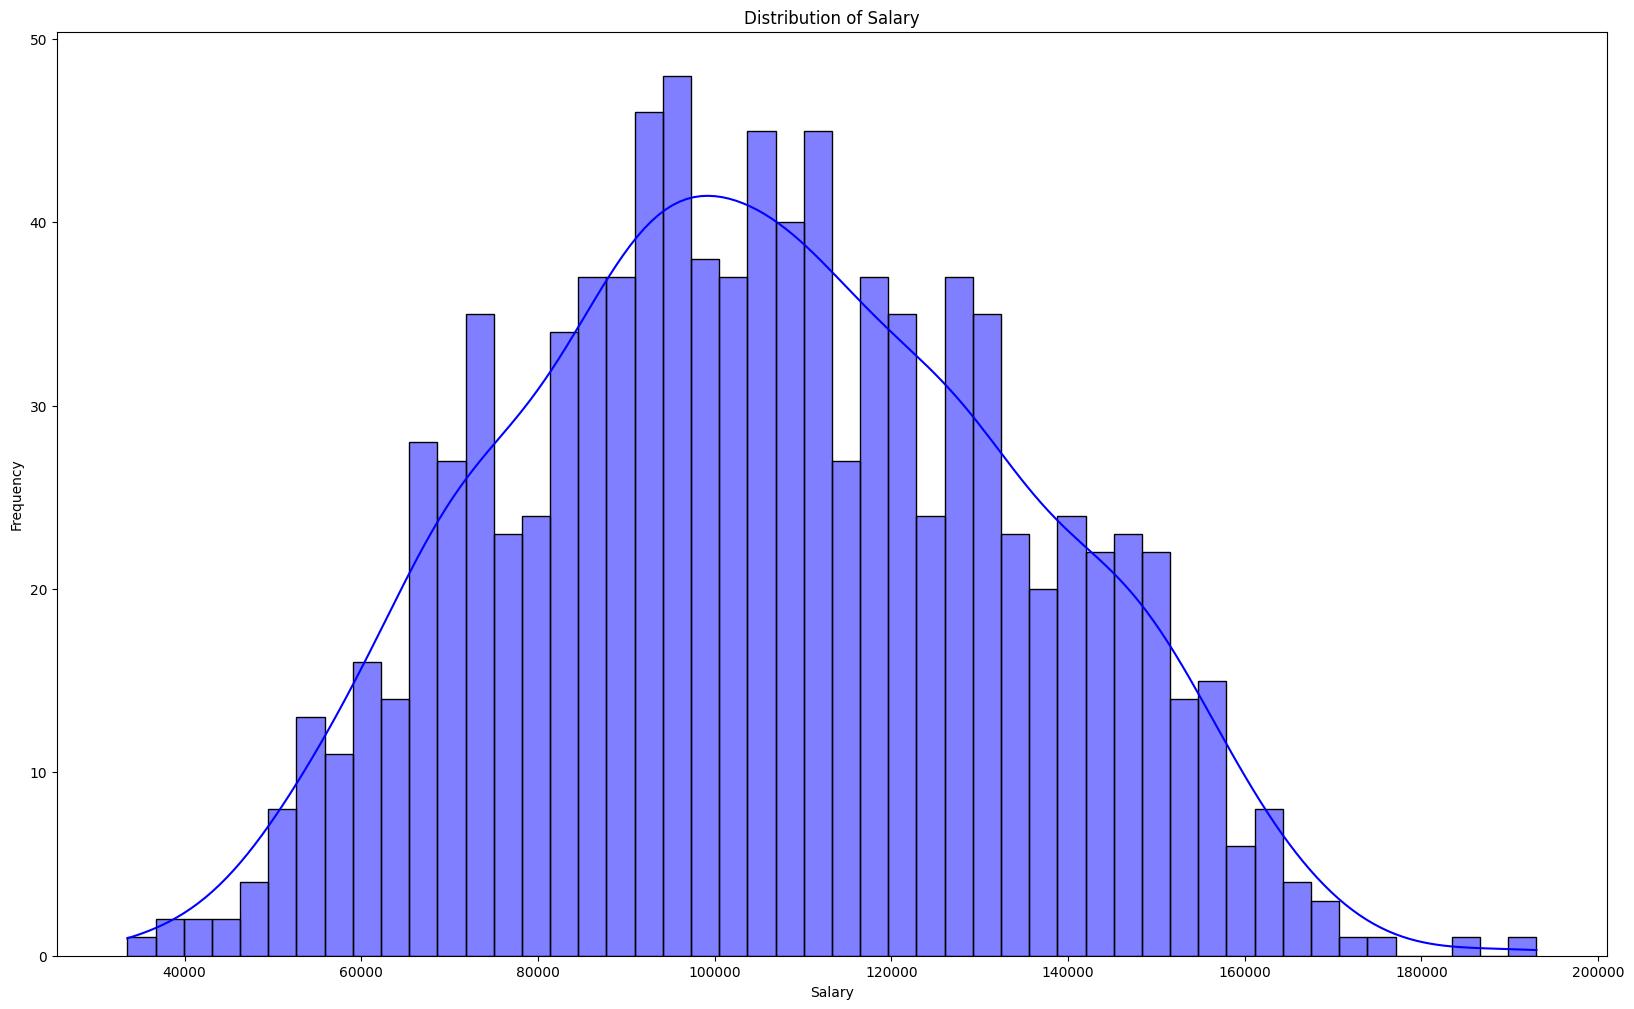

In [158]:
plt.figure(figsize=(20, 12))
sns.histplot(dt1['Salary'], kde=True, color='blue', bins=50)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [159]:
correlation_matrix = dt1.corr(numeric_only=True)

In [160]:
correlation_matrix

,Experience,Age,Salary
Experience,1.000000,0.044296,0.341918
Age,0.044296,1.000000,-0.053174
Salary,0.341918,-0.053174,1.000000


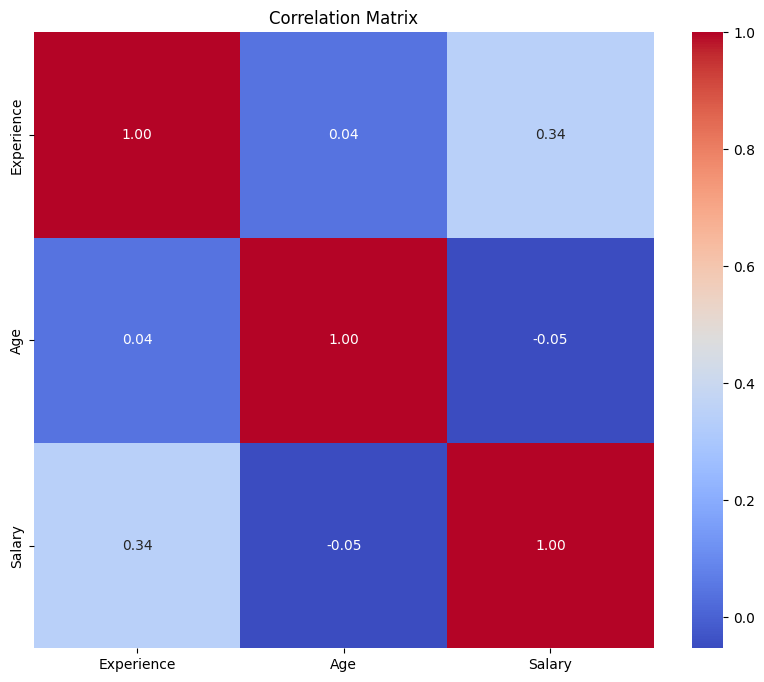

In [161]:
correlation_matrix = dt1.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [162]:
missing_values = dt1.isnull().sum()

In [163]:
missing_values

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [164]:
print(dt1)

       Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]


In [165]:
encoder = OneHotEncoder(sparse_output=False)
encoded_Education = encoder.fit_transform(dt1[['Education']])
encoded_Job_Title = encoder.fit_transform(dt1[['Job_Title']])
encoded_Location = encoder.fit_transform(dt1[['Location']])
encoded_Gender = encoder.fit_transform(dt1[['Gender']])


In [166]:
encoded_Education

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [167]:
encoded_Gender

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [168]:
encoded_Location

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [169]:
encoded_Job_Title

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [170]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Education']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Education']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [171]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Location']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Location']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [172]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Gender']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [173]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dt1[['Job_Title']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Job_Title']))

numeric_data = dt1.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

correlation_matrix = all_data.corr()

In [174]:
all_data.isnull().values.any()

np.False_

In [175]:
missing_values = all_data.isnull().sum()

In [176]:
missing_values

,0
Experience,0
Age,0
Salary,0
Job_Title_Analyst,0
Job_Title_Director,0
Job_Title_Engineer,0
Job_Title_Manager,0


In [177]:
all_data.shape

(1000, 7)

In [178]:
len(all_data.columns)

7

In [179]:
all_data.describe()

,Experience,Age,Salary,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239,0.255000,0.275000,0.229000,0.241000
std,8.341111,13.609412,28256.972075,0.436079,0.446738,0.420399,0.427904
min,1.000000,20.000000,33510.510669,0.000000,0.000000,0.000000,0.000000
25%,7.000000,30.000000,85032.141517,0.000000,0.000000,0.000000,0.000000
50%,15.000000,43.000000,104314.518315,0.000000,0.000000,0.000000,0.000000
75%,22.000000,55.000000,126804.047524,1.000000,1.000000,0.000000,0.000000
max,29.000000,64.000000,193016.602150,1.000000,1.000000,1.000000,1.000000


In [180]:
correlation_matrix

,Experience,Age,Salary,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
Experience,1.000000,0.044296,0.341918,-0.066214,0.001336,0.045514,0.021368
Age,0.044296,1.000000,-0.053174,0.016169,-0.019868,-0.000758,0.005009
Salary,0.341918,-0.053174,1.000000,-0.243538,0.327584,-0.160009,0.063392
Job_Title_Analyst,-0.066214,0.016169,-0.243538,1.000000,-0.360321,-0.318847,-0.329670
Job_Title_Director,0.001336,-0.019868,0.327584,-0.360321,1.000000,-0.335651,-0.347044
Job_Title_Engineer,0.045514,-0.000758,-0.160009,-0.318847,-0.335651,1.000000,-0.307099
Job_Title_Manager,0.021368,0.005009,0.063392,-0.329670,-0.347044,-0.307099,1.000000


In [181]:
all_data.to_csv('salary_prediction_data_2.csv', index=False)

In [182]:
x = all_data.drop(columns=['Salary'])
y = all_data['Salary']


In [183]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_data)

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [185]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [186]:
Y_pred = model.predict(X_test)

In [187]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(143.70949813350796,
 200220.3852569392,
 np.float64(447.4599258670425),
 0.001601869993431069,
 0.9997547901119552)

In [188]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [189]:
Y_pred = model.predict(X_test)

In [190]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(1.1968950275331736e-11,
 2.813737571660379e-22,
 np.float64(1.6774199151257204e-11),
 1.231809501766263e-16,
 1.0)

In [191]:
model = SVR()
model.fit(X_train, Y_train)

SVR()

In [192]:
Y_pred = model.predict(X_test)

In [193]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(23095.1858549468,
 821071051.2660176,
 np.float64(28654.33739010584),
 0.24830930985040225,
 -0.005565643575241586)

In [194]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [195]:
Y_pred = model.predict(X_test)

In [196]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(275.9025029479311,
 874410.6204320319,
 np.float64(935.0992569946957),
 0.003856490658646041,
 0.9989291093908036)

In [197]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]   # Regularization strength
}

ridge = Ridge()

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, Y_train)

print("Best Ridge Params:", grid_ridge.best_params_)
print("Best CV Score:", grid_ridge.best_score_)


Best Ridge Params: {'alpha': 0.01}
Best CV Score: 0.9999999996608885


In [198]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.9993872724825774


In [199]:
from sklearn.svm import SVR

param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, Y_train)

print("Best SVR Params:", grid_svr.best_params_)
print("Best CV Score:", grid_svr.best_score_)


Best SVR Params: {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.9999999999998768


In [200]:
from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, Y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)


Best DT Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score: 0.9994653191105854
